In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
from operator import *
pd.core.config.option_context('mode.use_inf_as_null',True)
import seaborn as sns
rcdefsns = plt.rcParams.copy()
import brewer2mpl
import os 
import sys

matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['axes.spines.top']='False'
matplotlib.rcParams['axes.spines.right']='False'
matplotlib.rcParams['axes.facecolor']='white'

In [11]:
islet_bulk_uniq=pd.read_csv('islet_bulk_uniq_data_cnts.csv',index_col=0)
islet_bulk_uniq_cpm=(islet_bulk_uniq/islet_bulk_uniq.sum())*1e6

t2d=pd.read_csv('../New.T2D-Counts.csv',index_col=0)
t2d_cpm=(t2d/t2d.sum())*1e6

nd=pd.read_csv('../New.NonT2D-Counts.csv',index_col=0)
nd_cpm=(nd/nd.sum())*1e6

islet_bulk_phenoData=pd.read_csv('islet_bulk_uniq_phenodata.csv',index_col=0)
islet_bulk_fetureData=pd.read_csv('islet_bulk_uniq_featuredata.csv',index_col=0)

t2d_phenoData=pd.read_csv('../New.T2D-CellClassification.csv',index_col=0)
nd_phenoData=pd.read_csv('../NewNonT2D-CellClassification.csv',index_col=0)

In [12]:
idx_T2D_intact=islet_bulk_phenoData[(islet_bulk_phenoData['Phenotype']=='T2D') & (islet_bulk_phenoData['Type'] == 'Intact')].index
idx_ND_intact=islet_bulk_phenoData[(islet_bulk_phenoData['Phenotype']=='ND') & (islet_bulk_phenoData['Type'] == 'Intact')].index

In [13]:
idx_beta_cells_t2d=t2d_phenoData[t2d_phenoData['cell.type']=='INS'].index
idx_alpha_cells_t2d=t2d_phenoData[t2d_phenoData['cell.type']=='GCG'].index
idx_gamma_cells_t2d=t2d_phenoData[t2d_phenoData['cell.type']=='PPY'].index
idx_delta_cells_t2d=t2d_phenoData[t2d_phenoData['cell.type']=='SST'].index

idx_beta_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='INS'].index
idx_alpha_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='GCG'].index
idx_gamma_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='PPY'].index
idx_delta_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='SST'].index
idx_acinar_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='PRSS1'].index
idx_stellate_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='COL1A1'].index
idx_dutcal_cells_nd=nd_phenoData[nd_phenoData['cell.type']=='KRT19'].index

In [15]:
t2d_means_by_celltype=pd.DataFrame(index=t2d.index,columns=['INS','GCG','PPY','SST'])
t2d_means_by_celltype['INS']=(t2d_cpm[idx_beta_cells_t2d]+1.).apply(np.log2).apply(np.mean,1)
t2d_means_by_celltype['GCG']=(t2d_cpm[idx_alpha_cells_t2d]+1.).apply(np.log2).apply(np.mean,1)
t2d_means_by_celltype['PPY']=(t2d_cpm[idx_gamma_cells_t2d]+1.).apply(np.log2).apply(np.mean,1)
t2d_means_by_celltype['SST']=(t2d_cpm[idx_delta_cells_t2d]+1.).apply(np.log2).apply(np.mean,1)

#### Colors and Genes

    Red (#e41a1c) = Beta
    Blue (#377eb8) = Alpha 
    Green (#4daf4a) = Delta 
    Purple = (#984ea3) Gamma 
    Orange = (#ff7f00) Epsilon/Ghrelin
    Black = (#000000) Stellate - COL1A1
    Grey = (#525252) Acinar - PRSS1
    Grey = (#969696) Ductal - KRT19
    Grey = (#D9D9D9) Nones

In [16]:
ins_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='INS'].index[0]
gcg_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='GCG'].index[0]
ppy_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='PPY'].index[0]
sst_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='SST'].index[0]
col1a1_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='COL1A1'].index[0]
krt19_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='KRT19'].index[0]
prss1_ensg=islet_bulk_fetureData[islet_bulk_fetureData['Associated.Gene.Name']=='PRSS1'].index[0]

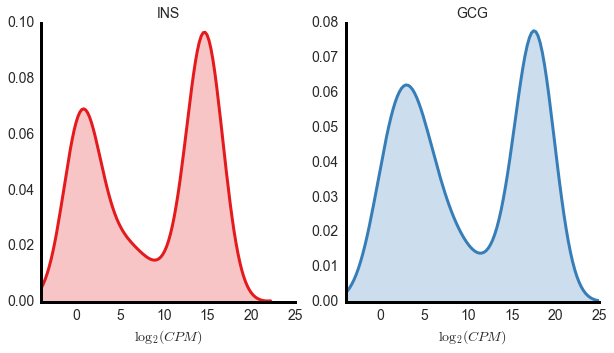

In [19]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['axes.spines.top']='False'
matplotlib.rcParams['axes.spines.right']='False'
matplotlib.rcParams['axes.facecolor']='white'

fig,ax=plt.subplots(1,2)

sns.kdeplot((nd_cpm.ix[ins_ensg]+1.).apply(np.log2),ax=ax[0],shade=True, color="#e41a1c",lw=3)
ax[0].set_xlim(-4,25)
ax[0].legend().set_visible(False)
ax[0].set_title('INS',fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

sns.kdeplot((nd_cpm.ix[gcg_ensg]+1.).apply(np.log2),ax=ax[1],shade=True, color="#377eb8",lw=3)
ax[1].set_xlim(-4,25)
ax[1].legend().set_visible(False)
ax[1].set_title('GCG',fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

#nd_cpm.ix[gcg_ensg].plot(kind='kde',lw=3,color='#e41a1c',ax=ax[1])

In [20]:
%%bash
mkdir Figures_06142016

In [21]:
fig.savefig('Figures_06142016/Figure2_gaussian_panelA.pdf',format='pdf',dpi=600)

In [47]:
fig.savefig('Figure2D.pdf',format='pdf',dpi=600)

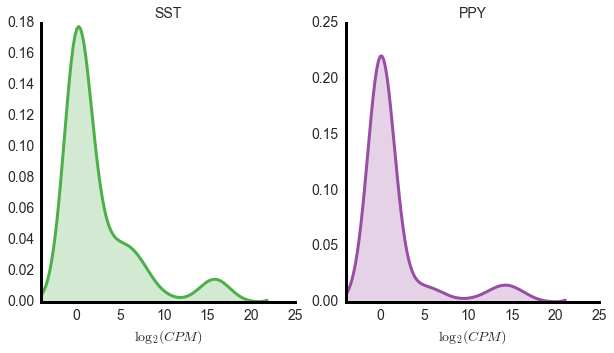

In [22]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['axes.spines.top']='False'
matplotlib.rcParams['axes.spines.right']='False'
matplotlib.rcParams['axes.facecolor']='white'

fig,ax=plt.subplots(1,2)

sns.kdeplot((nd_cpm.ix[sst_ensg]+1.).apply(np.log2),ax=ax[0],shade=True, color="#4daf4a",lw=3,bw=1.5)
ax[0].set_xlim(-4,25)
ax[0].legend().set_visible(False)
ax[0].set_title('SST',fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

sns.kdeplot((nd_cpm.ix[ppy_ensg]+1.).apply(np.log2),ax=ax[1],shade=True, color="#984ea3",lw=3,bw=1.5)
ax[1].set_xlim(-4,25)
ax[1].legend().set_visible(False)
ax[1].set_title('PPY',fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

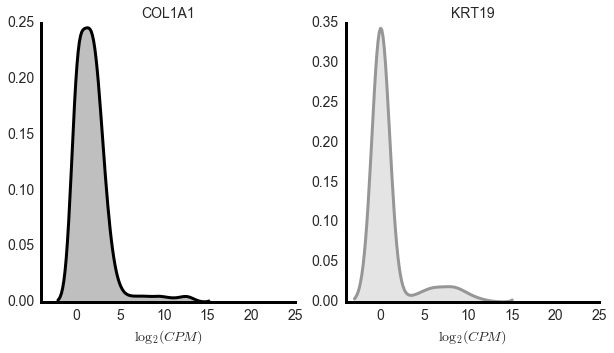

In [24]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['axes.spines.top']='False'
matplotlib.rcParams['axes.spines.right']='False'
matplotlib.rcParams['axes.facecolor']='white'

fig,ax=plt.subplots(1,2)

sns.kdeplot((nd_cpm.ix[col1a1_ensg]+1.).apply(np.log2),ax=ax[0],shade=True, color="#000000",lw=3,bw=.7)
ax[0].set_xlim(-4,25)
ax[0].legend().set_visible(False)
ax[0].set_title('COL1A1',fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

sns.kdeplot((nd_cpm.ix[krt19_ensg]+1.).apply(np.log2),ax=ax[1],shade=True, color="#969696",lw=3,bw=1.0)
ax[1].set_xlim(-4,25)
ax[1].legend().set_visible(False)
ax[1].set_title('KRT19',fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_xlabel(r'$\log_2(CPM)$',fontsize=14)

In [25]:
fig.savefig('Figures_06142016/Figure2D_col1a1-krt19.pdf',format='pdf',dpi=600)

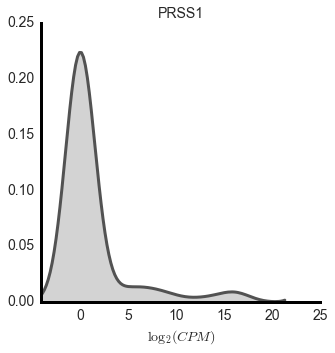

In [26]:
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['axes.spines.top']='False'
matplotlib.rcParams['axes.spines.right']='False'
matplotlib.rcParams['axes.facecolor']='white'

fig,ax=plt.subplots(1)

sns.kdeplot((nd_cpm.ix[prss1_ensg]+1.).apply(np.log2),ax=ax,shade=True, color="#525252",lw=3,bw=1.5)
ax.set_xlim(-4,25)
ax.legend().set_visible(False)
ax.set_title('PRSS1',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel(r'$\log_2(CPM)$',fontsize=14)

In [27]:
fig.savefig('Figures_06142016/Figure2D_prss1.pdf',format='pdf',dpi=600)